# Importing libraries



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the Retail Sales Dataset



In [ ]:
df = pd.read_csv("retail_sales_dataset.csv")

In [ ]:
df.columns

Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount'],
      dtype='object')

In [ ]:
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


# Basic Cleaning Dataset

In [ ]:
# dataset shape
df.shape

(1000, 11)

In [ ]:
# checking for null values
df.isnull().sum()

,0
Transaction ID,0
Date,0
Customer ID,0
Gender,0
Age,0
Product Category,0
Quantity,0
Price per Unit,0
Total Amount,0
Year,0


In [ ]:
# duplicates values, if any
duplicatess = df.duplicated().sum()
print(f"Number of duplicates: {duplicatess}")

Number of duplicates: 0


In [ ]:
# Format Date to YMD
df['Date'] = df['Date'].dt.strftime('%Y-%m-%d')

In [ ]:
# Convert Date into datetime format
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
# Extract year column from date
df['Year'] = df['Date'].dt.year

In [ ]:
# Create a Month column
monthly_order = ['January','February','March','April','May','June','July',
                 'August','September','October','November','December']
df['Month'] = pd.Categorical(df['Date'].dt.strftime('%B').astype(str), categories=monthly_order,ordered=True)

In [ ]:
# check for data type
df.dtypes

,0
Transaction ID,int64
Date,datetime64[ns]
Customer ID,object
Gender,object
Age,int64
Product Category,object
Quantity,int64
Price per Unit,int64
Total Amount,int64
Year,int32


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    1000 non-null   int64         
 1   Date              1000 non-null   datetime64[ns]
 2   Customer ID       1000 non-null   object        
 3   Gender            1000 non-null   object        
 4   Age               1000 non-null   int64         
 5   Product Category  1000 non-null   object        
 6   Quantity          1000 non-null   int64         
 7   Price per Unit    1000 non-null   int64         
 8   Total Amount      1000 non-null   int64         
 9   Month             1000 non-null   category      
dtypes: category(1), datetime64[ns](1), int64(5), object(3)
memory usage: 71.8+ KB


In [ ]:
df.describe()

,Transaction ID,Date,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,2023-07-03 00:25:55.200000256,41.39200,2.514000,179.890000,456.000000
min,1.000000,2023-01-01 00:00:00,18.00000,1.000000,25.000000,25.000000
25%,250.750000,2023-04-08 00:00:00,29.00000,1.000000,30.000000,60.000000
50%,500.500000,2023-06-29 12:00:00,42.00000,3.000000,50.000000,135.000000
75%,750.250000,2023-10-04 00:00:00,53.00000,4.000000,300.000000,900.000000
max,1000.000000,2024-01-01 00:00:00,64.00000,4.000000,500.000000,2000.000000
std,288.819436,NaN,13.68143,1.132734,189.681356,559.997632


# Descriptive Analysis

In [ ]:
# we used aggregate function to find mean, median,std, and mode(lambda) for the Total Amount Column.
print(df['Total Amount'].agg(['mean', 'median','std', lambda x: x.mode().iloc[0]]).round(2))

mean        456.0
median      135.0
std         560.0
<lambda>     50.0
Name: Total Amount, dtype: float64


In [ ]:
df['Total Amount'].describe()

,Total Amount
count,1000.000000
mean,456.000000
std,559.997632
min,25.000000
25%,60.000000
50%,135.000000
75%,900.000000
max,2000.000000


In [ ]:
print(df['Age'].agg(['mean','median','std',lambda x: x.mode().iloc[0]]))

mean        41.39200
median      42.00000
std         13.68143
<lambda>    43.00000
Name: Age, dtype: float64


In [ ]:
df['Age'].describe()

,Age
count,1000.00000
mean,41.39200
std,13.68143
min,18.00000
25%,29.00000
50%,42.00000
75%,53.00000
max,64.00000


In [ ]:
print(df['Quantity'].agg(['mean','median','std',lambda x:x.mode().iloc[0]]).round(2))

mean        2.51
median      3.00
std         1.13
<lambda>    4.00
Name: Quantity, dtype: float64


In [ ]:
df['Quantity'].describe()

,Quantity
count,1000.000000
mean,2.514000
std,1.132734
min,1.000000
25%,1.000000
50%,3.000000
75%,4.000000
max,4.000000


In [ ]:
print(df['Price per Unit'].agg(['mean','median','std',lambda x:x.mode().iloc[0]]))

mean        179.890000
median       50.000000
std         189.681356
<lambda>     50.000000
Name: Price per Unit, dtype: float64


In [ ]:
df['Price per Unit'].describe()

,Price per Unit
count,1000.000000
mean,179.890000
std,189.681356
min,25.000000
25%,30.000000
50%,50.000000
75%,300.000000
max,500.000000


In [ ]:
print(df['Product Category'].value_counts())

Product Category
Clothing       351
Electronics    342
Beauty         307
Name: count, dtype: int64


In [ ]:
# percentage counts
print(df['Product Category'].value_counts(normalize=True)*100)

Product Category
Clothing       35.1
Electronics    34.2
Beauty         30.7
Name: proportion, dtype: float64


In the above analysis we can observe that clothing is most frequently purchased category. And it also indicates that Clothing popularity will boost the market sales in the future as well.

In [ ]:
print(df['Gender'].value_counts())

Gender
Female    510
Male      490
Name: count, dtype: int64


This analysis shows that female customers are more intend to purchase than man.

In [ ]:
print("Total sales:{}".format(df['Quantity'].sum()))
print("Total profit: {}".format(df['Total Amount'].sum()))

Total sales:2514
Total profit: 456000


In [ ]:
print(f"Total sales: {(df['Quantity'].sum())}")
print(f"Total profit: {(df['Total Amount'].sum())}")

Total sales: 2514
Total profit: 456000


The number of Quantity sold and total profit shows that market is generating good income.

# Product Contribution

In [ ]:
# sales product category wise
# print(df.groupby('Product Category')['Total Amount'].sum().sort_values(ascending=True))
product_sales = df.groupby('Product Category')['Total Amount'].sum().sort_values(ascending=False)
print(product_sales)

Product Category
Electronics    156905
Clothing       155580
Beauty         143515
Name: Total Amount, dtype: int64


In [ ]:
# overall sales
total_sales = df['Total Amount'].sum()
print(f"Total sales: {total_sales}")
# print('Total Sales:' , df['Total Amount'].sum())

Total sales: 456000


In [ ]:
# percentage contribution
print((product_sales/total_sales *100).round(2).sort_values(ascending= False))

Product Category
Electronics    34.41
Clothing       34.12
Beauty         31.47
Name: Total Amount, dtype: float64


In [ ]:
# rename the columns
# column_names = df.rename(columns={'Quantity' : 'Total Quantity Sold',
#                    'Total Amount' : 'Total Sales'})

In [ ]:
# # which products sold more
productss = df.groupby('Product Category')[['Quantity','Total Amount']].sum().sort_values(by= 'Quantity',ascending=False).reset_index()
productss = productss.rename(columns={'Quantity' : 'Total Quantity Sold',
                   'Total Amount' : 'Total Sales'})
print(productss)
# sns.histplot(data=productss, x= 'Product Category', y='Total Quantity Sold')


  Product Category  Total Quantity Sold  Total Sales
0         Clothing                  894       155580
1      Electronics                  849       156905
2           Beauty                  771       143515


# Data Visualization

Text(0, 0.5, 'Quantity Sold')

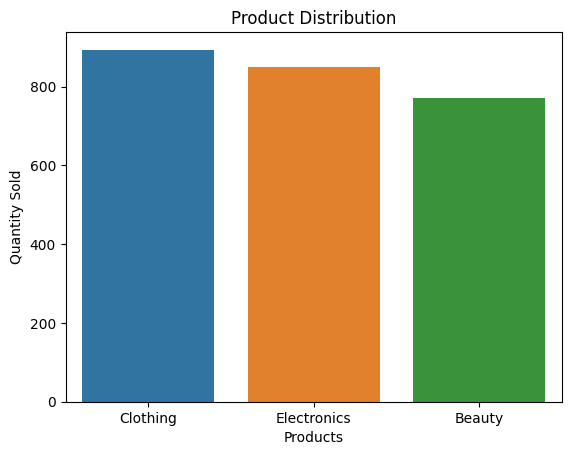

In [ ]:
sns.barplot(data=productss, x= 'Product Category',y='Total Quantity Sold', hue= 'Product Category')
plt.title('Product Distribution')
plt.xlabel('Products')
plt.ylabel('Quantity Sold')

This graph indicates that clothing is leading more in all three categories of products.

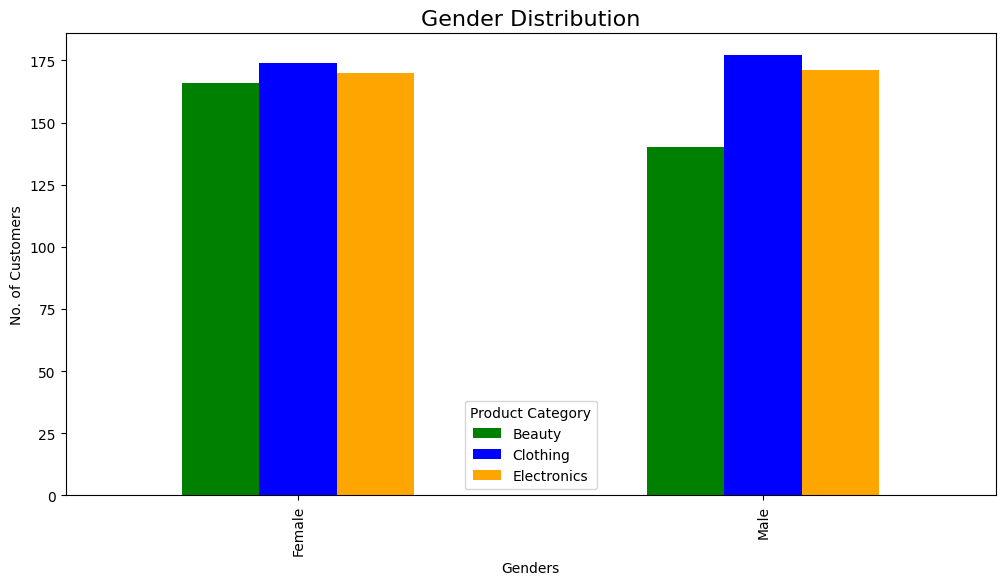

In [ ]:
desire_colors = {'Clothing':'blue',
                 'Electronics':'orange',
                 'Beauty':'green'}
df.groupby(['Gender','Product Category'])['Customer ID'].count().unstack().plot(kind='bar',stacked=False,figsize=(12,6),color=desire_colors)
plt.title('Gender Distribution', fontsize = 16)
plt.xlabel('Genders')
plt.ylabel('No. of Customers')
plt.legend(title='Product Category')

Text(0, 0.5, 'Customer counts')

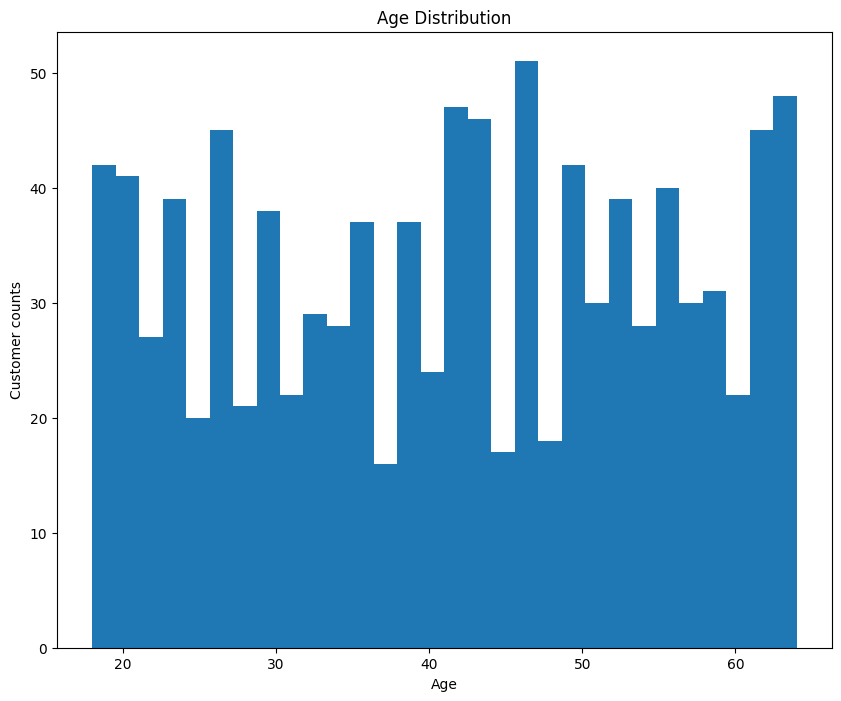

In [ ]:
df['Age'].plot(kind='hist',bins=30,title="Age Distribution",figsize=(10,8))
plt.xlabel('Age')
plt.ylabel('Customer counts')


<Axes: title={'center': 'Product Category Percentage'}>

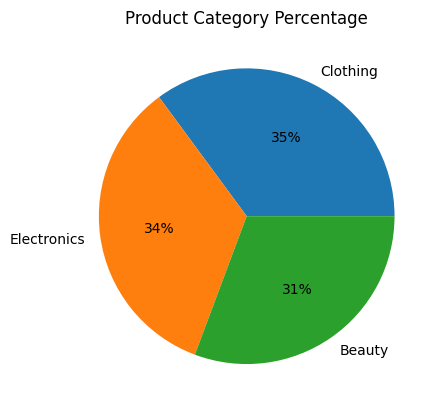

In [ ]:
product_category_counts = df['Product Category'].value_counts()
product_category_counts.plot(kind='pie',title= 'Product Category Percentage',autopct= '%1.0f%%',ylabel='')


# Time Series Analysis

Text(0, 0.5, 'Total Sales Per Month')

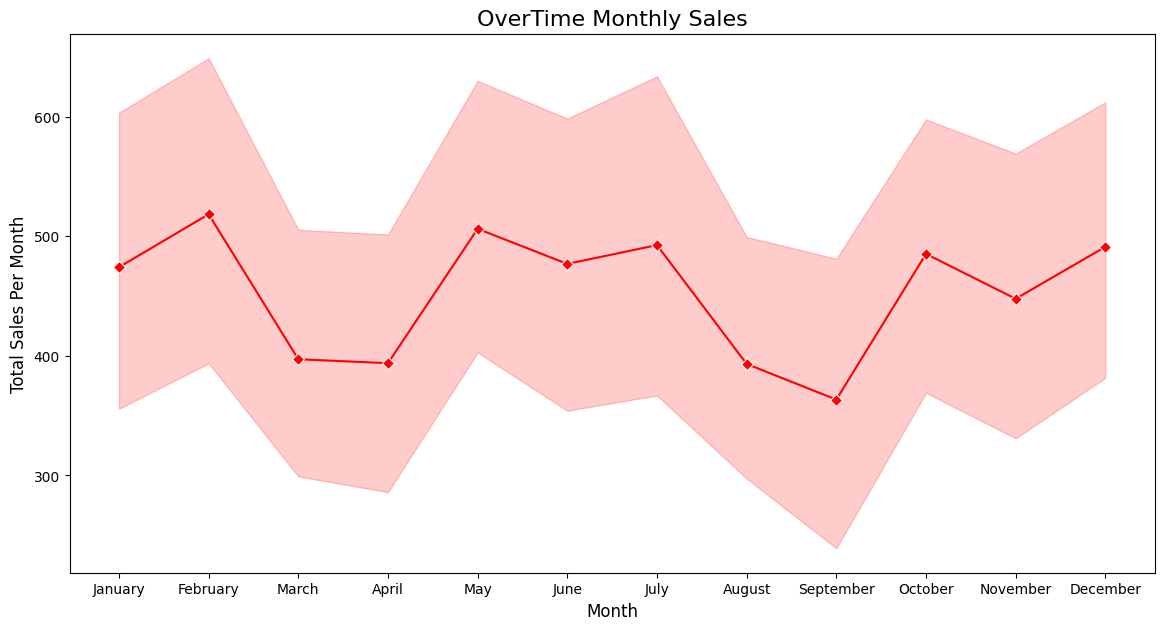

In [ ]:
plt.figure(figsize=(14,7))
sns.lineplot(x=df.Month,y=df['Total Amount'],marker='D',color='r', linestyle='-')
# ci=None
plt.title("OverTime Monthly Sales",fontsize= 16)
plt.xlabel('Month',fontsize= 12)
plt.ylabel('Total Sales Per Month',fontsize=12)

In [ ]:
Transaction_counts= (df.groupby('Month')['Transaction ID'].count().reset_index())
print(Transaction_counts)

        Month  Transaction ID
0     January              78
1    February              85
2       March              73
3       April              86
4         May             105
5        June              77
6        July              72
7      August              94
8   September              65
9     October              96
10   November              78
11   December              91


<ipython-input-23-80d5f9f9359d>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Transaction_counts= (df.groupby('Month')['Transaction ID'].count().reset_index())


Text(0, 0.5, 'Transaction Counts')

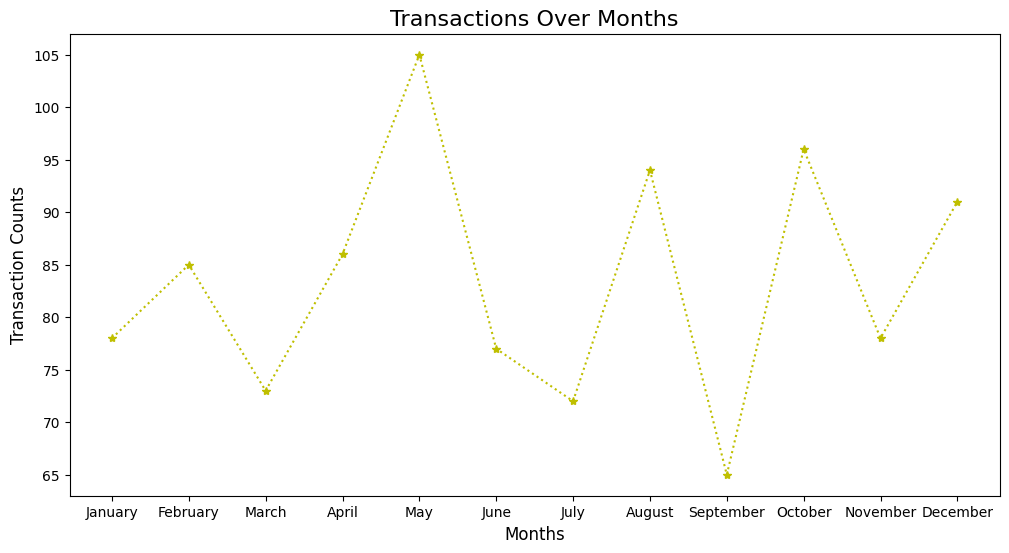

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(Transaction_counts['Month'],Transaction_counts['Transaction ID'],marker='*',color='y',linestyle=':')
plt.title('Transactions Over Months',fontsize= 16)
plt.xlabel('Months',fontsize=12)
plt.ylabel('Transaction Counts',fontsize=12)



In [ ]:
Transaction_counts.reset_index()

,index,Month,Transaction ID
0,0,January,78
1,1,February,85
2,2,March,73
3,3,April,86
4,4,May,105
5,5,June,77
6,6,July,72
7,7,August,94
8,8,September,65
9,9,October,96


In [ ]:
monthly_sales = df.groupby('Month')['Total Amount'].sum().reset_index()

<ipython-input-38-fa692fbfc5a3>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_sales = df.groupby('Month')['Total Amount'].sum().reset_index()


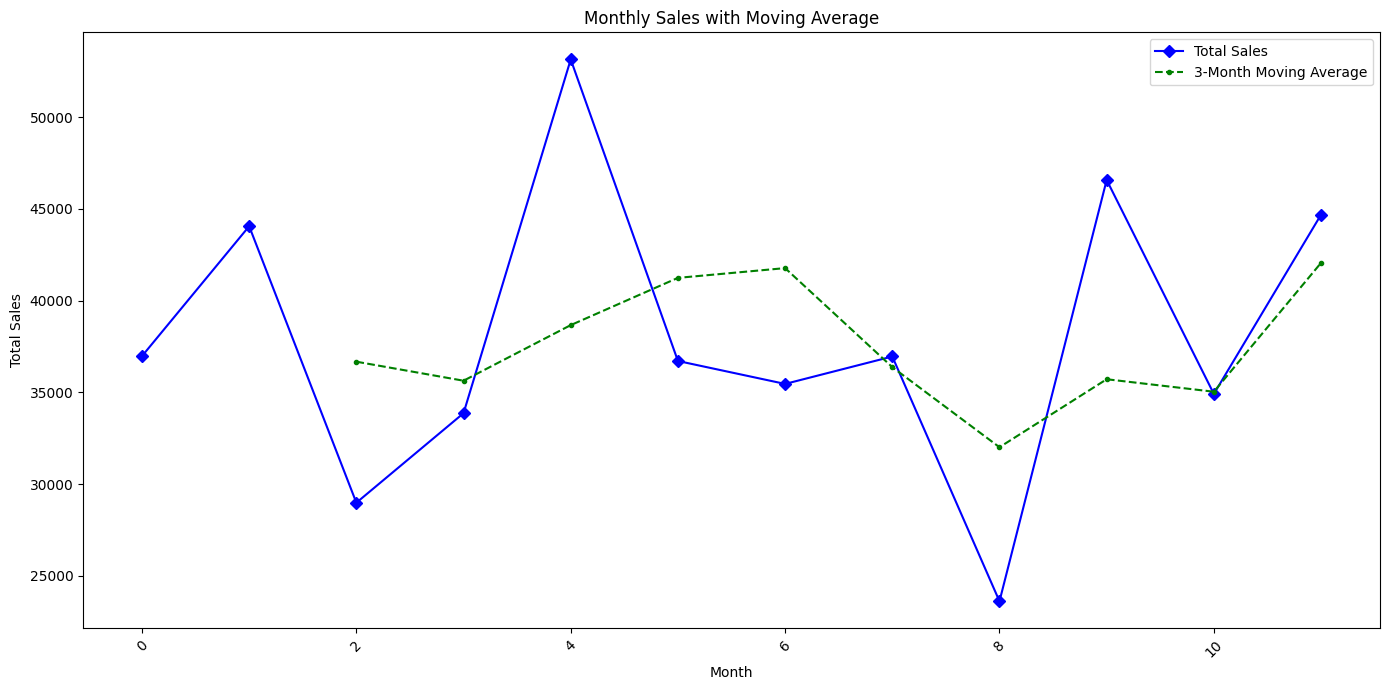

In [ ]:
monthly_sales['moving average'] = monthly_sales['Total Amount'].rolling(window=3).mean()
plt.figure(figsize=(14,7))
plt.plot(monthly_sales.index,monthly_sales['Total Amount'],color= 'blue',marker='D',label='Total Sales')
plt.plot(monthly_sales.index, monthly_sales['moving average'], linestyle='--', color='green', marker= '.',label='3-Month Moving Average')

plt.title('Monthly Sales with Moving Average')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The overall trend is fluctuating, as sales are decreasing but then increasing on peak.
Moveover, the 3- month moving average line is showing significantly high sale in first 6 months, then a drop in sale and end towards a high sales.

In [ ]:
# monthly_sales.head()

<ipython-input-168-b3d164732865>:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot= df.pivot_table(index='Month',columns='Year',values='Total Amount',aggfunc='sum')


Text(120.72222222222221, 0.5, 'Month')

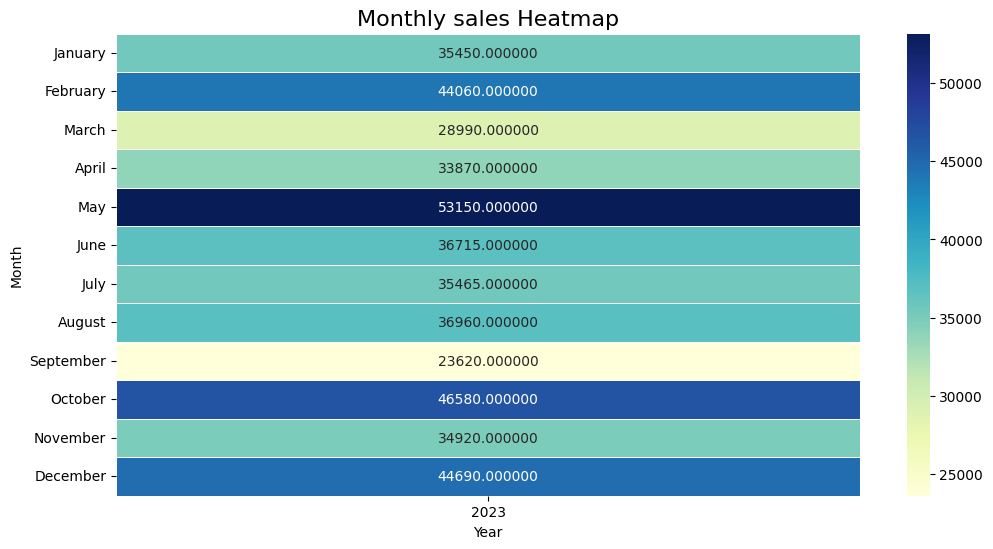

In [ ]:
# df = df[df['Year'] == 2023]
pivot= df.pivot_table(index='Month',columns='Year',values='Total Amount',aggfunc='sum')
plt.figure(figsize=(12,6))
sns.heatmap(pivot, annot=True,fmt= '0f', cmap= 'YlGnBu',linewidths= 0.5)
plt.title('Monthly sales Heatmap',fontsize=16)
plt.xlabel('Year')
plt.ylabel('Month')

This graph illustrates monthly profit trends, highlighting how profits fluctuates across different months of the year.

# Customer and Product Analysis

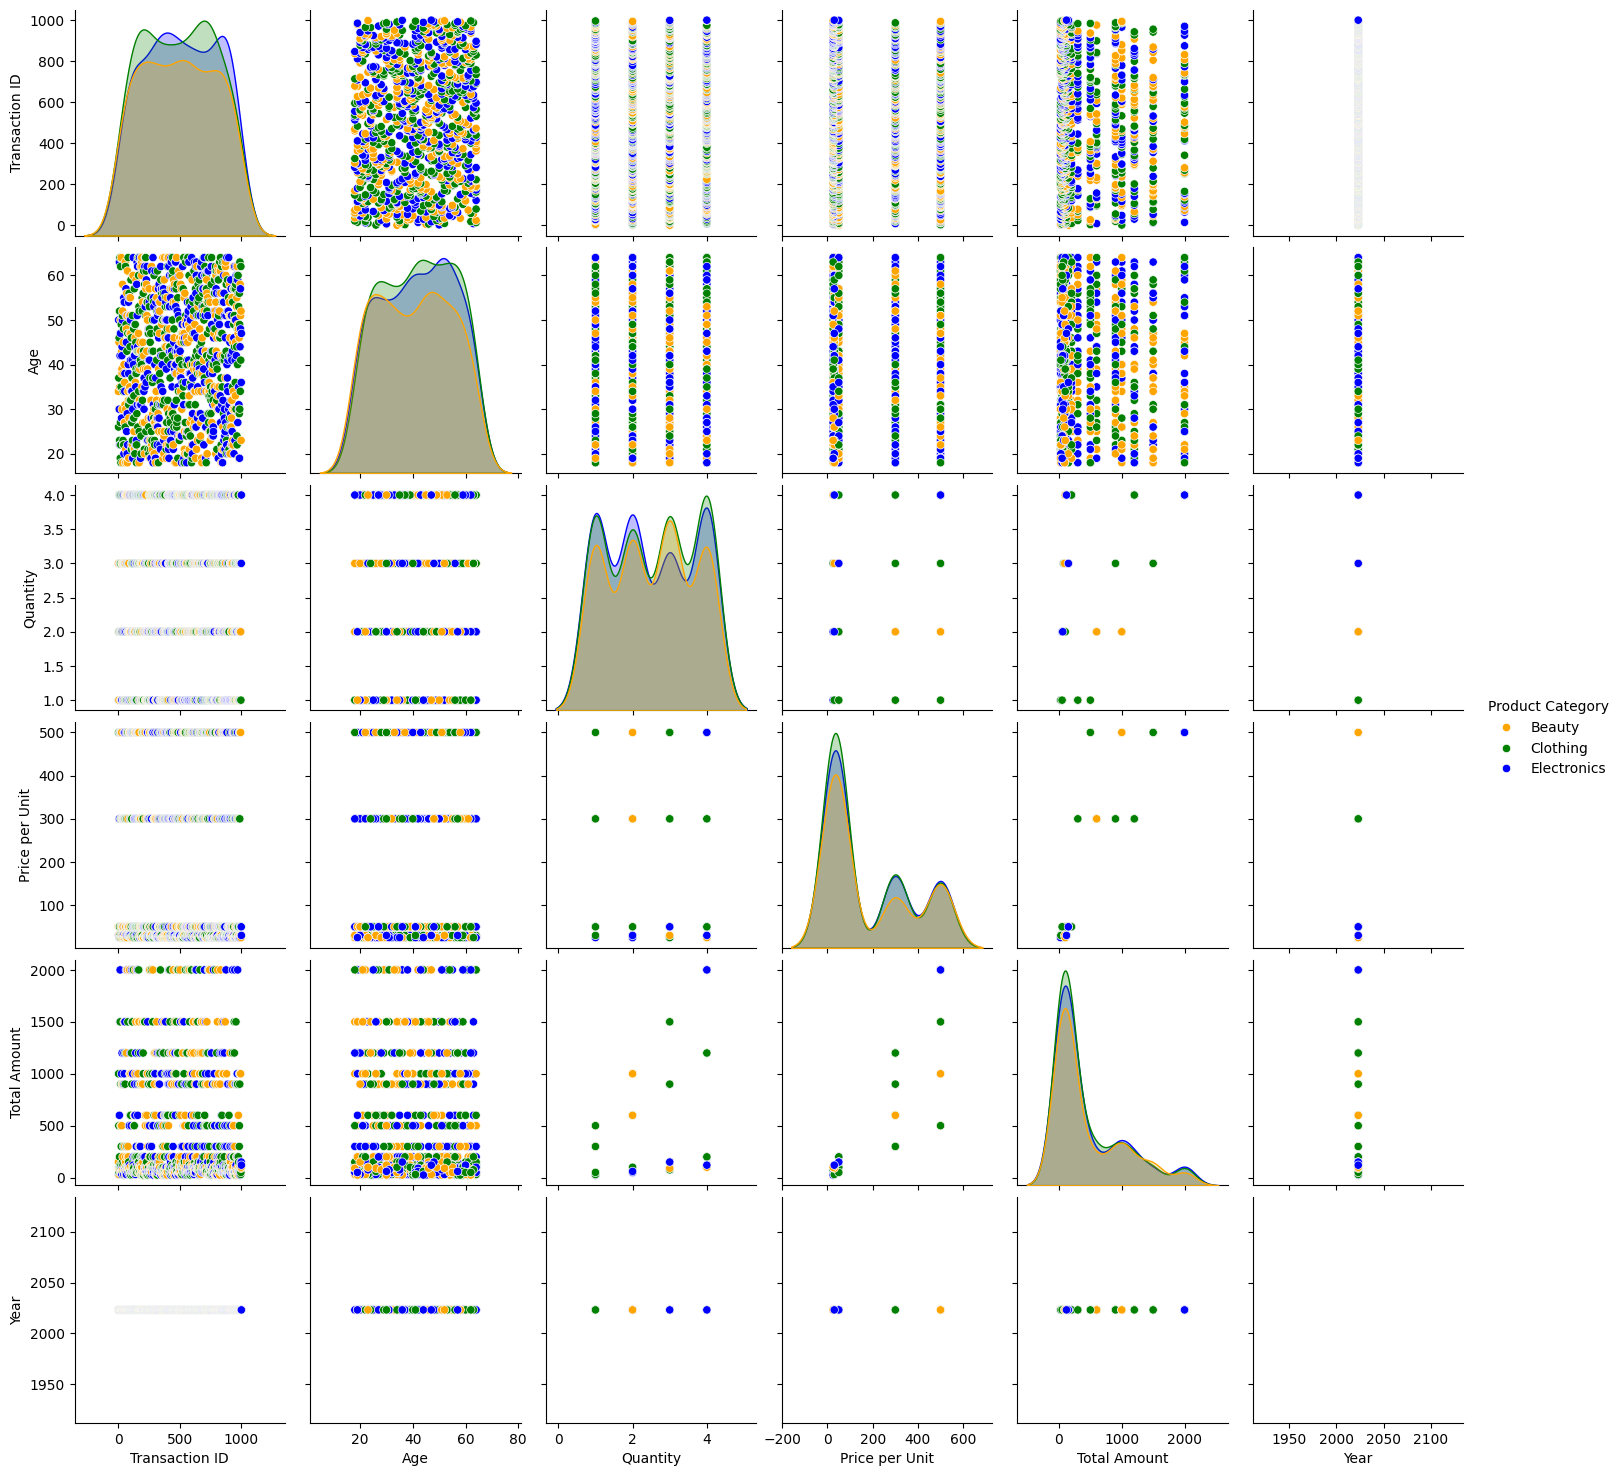

In [ ]:
sns.pairplot(data=df, hue='Product Category',palette=['orange','green','blue'])

Text(0.5, 1.0, 'Correlation Between Age and Spendings')

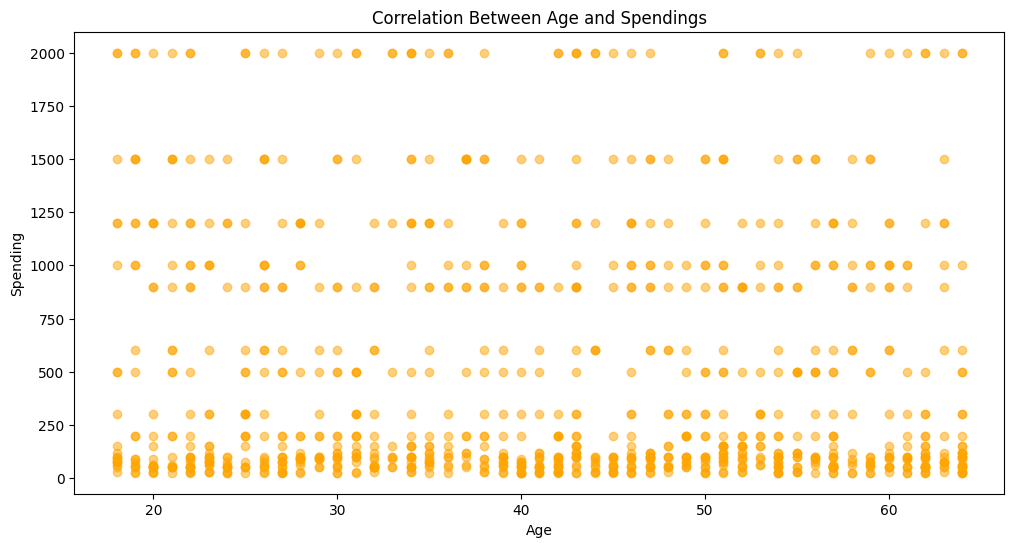

In [ ]:
# Correlation between age and spending
plt.figure(figsize=(12,6))
plt.scatter(df['Age'],df['Total Amount'],alpha=0.5, color=['orange'])
plt.xlabel('Age')
plt.ylabel('Spending')
plt.title('Correlation Between Age and Spendings')